In [55]:
#IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
#IMPORTING THE DATASET
dataset = pd.read_excel('input_female.xlsx')
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [57]:
print(dataset)

    Catergory  Ferritin    FSH  ...  Progesterone   MDA   Protein Carbonyl
0           1      2245   1.06  ...          1.57  12.37              1.47
1           1      2368   1.96  ...          1.19  11.69              2.07
2           1      2361   0.59  ...          1.21  13.69              2.61
3           1      1700   5.27  ...          1.16   9.20              1.63
4           1      6214   3.41  ...          0.29  14.35              2.09
5           1      1607   7.68  ...          2.20   7.28              1.63
6           1      2629   1.03  ...          3.29  13.05              2.33
7           1      6041   0.21  ...          0.65  13.74              2.20
8           1      2789   2.38  ...          0.84  12.57              1.99
9           1      1840   2.38  ...          2.09   9.20              1.92
10          1      2313   1.37  ...          2.14  11.03              1.72
11          1      2846   0.04  ...          0.54  13.20              1.86
12          1      2980  

In [58]:
#VALIDATION DATASET
dataset_validation=dataset.sample(frac=0.18, random_state=10)

In [59]:
print(dataset_validation)

    Catergory  Ferritin    FSH  ...  Progesterone   MDA   Protein Carbonyl
20          1      3877   0.19  ...          1.24  13.87              2.16
3           1      1700   5.27  ...          1.16   9.20              1.63
46          2        27   6.20  ...          6.99   1.54              1.17
17          1      6170   0.06  ...          0.55  14.36              2.21
31          2        47   1.03  ...          5.45   6.81              0.78
35          2        43  20.65  ...          9.45   5.00              0.82
39          2        13   6.30  ...          7.46   6.15              1.10
26          1      4160   0.56  ...          0.46  16.28              2.47
21          1      3690   0.53  ...          0.10  13.63              2.41
38          2        60   3.90  ...          4.72   4.29              0.81

[10 rows x 8 columns]


In [60]:
X = dataset_validation.iloc[:,1:8].values
y = dataset_validation.iloc[:, -1].values

In [61]:
print(X)

[[3.877e+03 1.900e-01 3.500e-01 8.500e-01 1.240e+00 1.387e+01 2.160e+00]
 [1.700e+03 5.270e+00 1.060e+00 2.064e+01 1.160e+00 9.200e+00 1.630e+00]
 [2.700e+01 6.200e+00 1.620e+01 2.145e+01 6.990e+00 1.540e+00 1.170e+00]
 [6.170e+03 6.000e-02 3.500e-01 9.700e-01 5.500e-01 1.436e+01 2.210e+00]
 [4.700e+01 1.030e+00 1.500e+00 5.000e+01 5.450e+00 6.810e+00 7.800e-01]
 [4.300e+01 2.065e+01 5.250e+00 6.690e+00 9.450e+00 5.000e+00 8.200e-01]
 [1.300e+01 6.300e+00 8.700e+00 1.238e+01 7.460e+00 6.150e+00 1.100e+00]
 [4.160e+03 5.600e-01 4.500e-01 1.840e+00 4.600e-01 1.628e+01 2.470e+00]
 [3.690e+03 5.300e-01 3.100e-01 4.600e+00 1.000e-01 1.363e+01 2.410e+00]
 [6.000e+01 3.900e+00 1.440e+01 1.902e+01 4.720e+00 4.290e+00 8.100e-01]]


In [62]:
print(y)

[2.16 1.63 1.17 2.21 0.78 0.82 1.1  2.47 2.41 0.81]


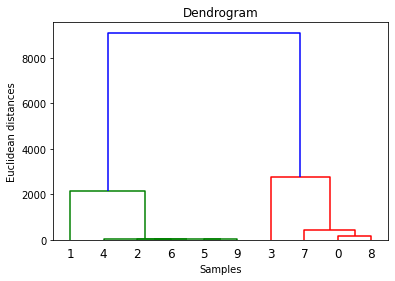

In [63]:
## Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [64]:
## Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [65]:
print(y_hc)

[0 3 1 2 1 1 1 0 0 1]


In [66]:
#COUNTING THE NUMBER OF PATIENTS WITH NO DISEASE
no_disease=0
for i in y_hc:
    if i==3:
        no_disease+=1
print(no_disease)

1


In [67]:
#COUNTING THE NUMBER OF PATIENTS IN EACH SEVERITY LEVEL OF HAVING DISEASE
dis_severity=[]
cluster_0=0
cluster_1=0
cluster_2=0
for i in y_hc:
    if i!=3:
        if i==0:
            cluster_0+=1
        elif i==1:
            cluster_1+=1
        else:
            cluster_2+=1
print("Cluster 1:",cluster_1)
print("Cluster 3:",no_disease)
print("Cluster 2:",cluster_2)
print("Cluster 0:",cluster_0)

Cluster 1: 5
Cluster 3: 1
Cluster 2: 1
Cluster 0: 3


In [68]:
#CLUSTER 3: NO DISEASE
#CLUSTER 2: MILD DISEASE
#CLUSTER 1: MODERATE DISEASE
#CLUSTER 0: SEVERE DISEASE

In [69]:
#APPENDING THE CLUSTER LABELS TO THE ORIGINAL DATA
dataset_validation = dataset_validation.copy()
dataset_validation['Cluster'] = y_hc
display(dataset_validation.sort_values(by='Cluster'))

,Catergory,Ferritin,FSH,LH,Estradiol,Progesterone,MDA,Protein Carbonyl,Cluster
20,1,3877,0.19,0.35,0.85,1.24,13.87,2.16,0
26,1,4160,0.56,0.45,1.84,0.46,16.28,2.47,0
21,1,3690,0.53,0.31,4.60,0.10,13.63,2.41,0
46,2,27,6.20,16.20,21.45,6.99,1.54,1.17,1
31,2,47,1.03,1.50,50.00,5.45,6.81,0.78,1
35,2,43,20.65,5.25,6.69,9.45,5.00,0.82,1
39,2,13,6.30,8.70,12.38,7.46,6.15,1.10,1
38,2,60,3.90,14.40,19.02,4.72,4.29,0.81,1
17,1,6170,0.06,0.35,0.97,0.55,14.36,2.21,2
3,1,1700,5.27,1.06,20.64,1.16,9.20,1.63,3


In [70]:
#CLASSIFICATION

In [71]:
X2 = dataset_validation.iloc[:,1:8].values
y2 = dataset_validation.iloc[:, -1].values

In [72]:
print(X2)

[[3.877e+03 1.900e-01 3.500e-01 8.500e-01 1.240e+00 1.387e+01 2.160e+00]
 [1.700e+03 5.270e+00 1.060e+00 2.064e+01 1.160e+00 9.200e+00 1.630e+00]
 [2.700e+01 6.200e+00 1.620e+01 2.145e+01 6.990e+00 1.540e+00 1.170e+00]
 [6.170e+03 6.000e-02 3.500e-01 9.700e-01 5.500e-01 1.436e+01 2.210e+00]
 [4.700e+01 1.030e+00 1.500e+00 5.000e+01 5.450e+00 6.810e+00 7.800e-01]
 [4.300e+01 2.065e+01 5.250e+00 6.690e+00 9.450e+00 5.000e+00 8.200e-01]
 [1.300e+01 6.300e+00 8.700e+00 1.238e+01 7.460e+00 6.150e+00 1.100e+00]
 [4.160e+03 5.600e-01 4.500e-01 1.840e+00 4.600e-01 1.628e+01 2.470e+00]
 [3.690e+03 5.300e-01 3.100e-01 4.600e+00 1.000e-01 1.363e+01 2.410e+00]
 [6.000e+01 3.900e+00 1.440e+01 1.902e+01 4.720e+00 4.290e+00 8.100e-01]]


In [73]:
print(y2)

[0 3 1 2 1 1 1 0 0 1]


In [74]:
#SPLITTING THE DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [75]:
print(X2_test)

[[2.700e+01 6.200e+00 1.620e+01 2.145e+01 6.990e+00 1.540e+00 1.170e+00]
 [3.690e+03 5.300e-01 3.100e-01 4.600e+00 1.000e-01 1.363e+01 2.410e+00]]


In [76]:
#FEATURE SELECTION
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [77]:
#KNN

In [78]:
#TRAINING KNN MODEL ON THE TRAINING SET
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
#PREDICTING THE TEST SET RESULTS
y_pred = classifier.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[1 1]
 [0 0]]


In [80]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X2_test)
cm1 = confusion_matrix(y2_test, y_pred)
print(cm1)
accuracy_score(y2_test, y_pred)

[[1 0]
 [0 1]]


1.0

In [81]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  1.0


In [82]:
#PREDICTING A NEW RESULT
print(classifier.predict(sc.transform([[6241,3.14,0.33,0.68,0.29,14.35,4.09]])))

[0]


In [83]:
##SVM

In [84]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X2_train, y2_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [85]:
#PREDICTING THE TEST SET RESULTS
y_pred = classifier2.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[1 1]
 [0 0]]


In [86]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier2.predict(X2_test)
cm = confusion_matrix(y2_test, y_pred)
print(cm)
accuracy_score(y2_test, y_pred)

[[1 0]
 [0 1]]


1.0

In [87]:
#PREDICTING A NEW RESULT
print(classifier2.predict(sc.transform([[6241,3.14,0.33,0.68,0.29,14.35,4.09]])))

[0]


In [88]:
##NAIVE BAYES

In [89]:
#NAIVE BAYES CLASSIFICATION
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X2_train, y2_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [90]:
#PREDICTING THE TEST SET RESULTS
y_pred = classifier3.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[1 1]
 [0 0]]


In [91]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier3.predict(X2_test)
cm = confusion_matrix(y2_test, y_pred)
print(cm)
accuracy_score(y2_test, y_pred)

[[1 0]
 [0 1]]


1.0